# Stationarity of stochastic processes II

Author: [Zeel B Patel](https://patel-zeel.github.io/)

https://bookdown.org/gary_a_napier/time_series_lecture_notes/ChapterThree.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation

rc('font', size=16)
rc('text', usetex=True)
rc('animation', html='jshtml')

The function below generates multiple samples of $n$ length, $d$ order stationary process using the following AR equation (AR stands for auto-regressive),

$$
y_t = \sum\limits_{i=1}^{d}y_{t-d}\phi_{t-d} + \mathcal{N}(0, 1)
$$

In [2]:
def AR(phi, n):
    order = len(phi)
    x = [0 for _ in range(order)]
    for i in range(n-order):
        tmp = np.sum(np.array(x[-order:])*phi+np.random.normal(0,1))
        x.append(tmp)
    return x

Let us visualize many samples from AR($d=1,n=100,\phi=\{0.8\}$) stochastic process.

In [3]:
def plot_AR(Phi, n):
    X = []
    for i in range(201):
        X.append(AR(Phi, n))
    for sample in X:
        plt.plot(sample, alpha=0.2);

    means = np.mean(X, axis=0)
    std2 = np.std(X, axis=0)*2
    plt.plot(means, label='Mean')
    plt.fill_between(range(n), means-std2, means+std2, label='Mean $\pm\;2\sigma$');
    plt.legend(bbox_to_anchor=(1,1));
    plt.xlabel('$t$')
    plt.ylabel('$f(t)$')

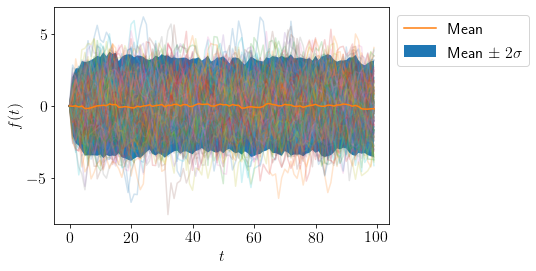

In [4]:
plot_AR([0.8], 100)

Let us try changing $\phi=\{-0.8\}$

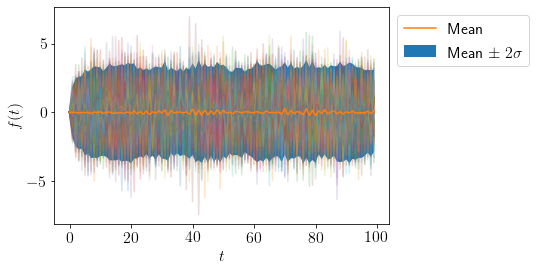

In [5]:
plot_AR([-0.8], 100)

We can see that mean and variance of samples at any time $t$ is almost constant.

Let us draw some samples from a AR($d=1,n=100,\phi=\{1.01\}$).

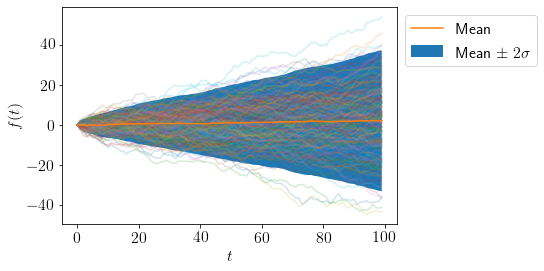

In [6]:
plot_AR([1.01], 100)

We can see that mean is almost constant over time but variance is varying significantly.

What are the insights? For AR(1) process,

\begin{align}
y_t &= y_{t-1}\phi_{t-1}+Z_t , \;\;\;Z_t \sim \mathcal{N}(0,1)\\
y_t - y_{t-1}\phi_{t-1} &= Z_t\\ 
(1 - B\phi_{t-1})y_t &= Z_t
\end{align}

We define charesterstic equation as following,


$$
f_c(B) = 1 - B\phi_{t-1} = 0
$$

If roots (magnitude of roots in case of imaginary roots) of $f_c(B)$ are outside unit circle or in other words, $|B|>1$, AR(1) process is stationary.

* For $\phi=0.8$, $B=1.25$ so, AR($d=1, \phi=0.8$) is a stationary process.
* For $\phi=1.01$, $B=0.99$ so, AR($d=1, \phi=1.01$) is a non-stationary process.

Same rule is applicable for AR($d$) process for any value of $d$.

Let us try an AR($d=3$) process now.

We take AR($d=3,n=100,\phi=\{0.1, 0.2, 0.3\}$).

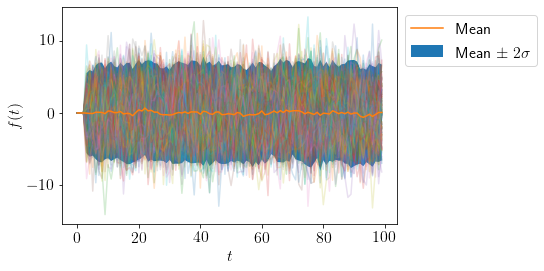

In [7]:
plot_AR([0.1, 0.2, 0.3], 100)

From the graph, process looks stationary, let us find the roots of the following charesterstic equation,

$$
f_c(B) = 1 - 0.1B - 0.2B^2 - 0.3B^3 = 0
$$

In [8]:
np.roots([-0.3, -0.2, -0.1, 1]), np.abs(np.roots([-0.3, -0.2, -0.1, 1]))

(array([-0.95244656+1.3359895j, -0.95244656-1.3359895j,
         1.23822645+0.j       ]),
 array([1.64073837, 1.64073837, 1.23822645]))

We see that all the roots are outside the unit circle, so the process must be stationary. 

Let us try one more example.

AR($d=3, n=10, \phi=\{0.6, 0.8, 0.9\}$)

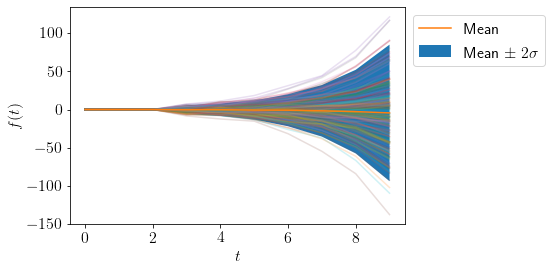

In [9]:
plot_AR([0.6, 0.8, 0.9], 10)

In [10]:
np.roots([-0.9, -0.8, -0.6, 1]), np.abs(np.roots([-0.9, -0.8, -0.6, 1]))

(array([-0.77387424+1.04284911j, -0.77387424-1.04284911j,
         0.6588596 +0.j        ]),
 array([1.29862066, 1.29862066, 0.6588596 ]))

We can see that atleast one root is inside the unit circle, thus the process is non-stationary.